# Calculus and Derivatives: A Comprehensive Professional Guide

## Overview
This professional-grade notebook provides an exhaustive exploration of calculus, with emphasis on derivatives and their applications. Covering foundational concepts through advanced applications in machine learning, this guide bridges mathematical theory with computational practice.

## Table of Contents
1. [Introduction to Calculus](#intro)
2. [Limits and Continuity](#limits)
3. [The Derivative: Definition and Intuition](#derivative-def)
4. [Basic Differentiation Rules](#basic-rules)
5. [Chain Rule](#chain-rule)
6. [Product and Quotient Rules](#product-quotient)
7. [Higher-Order Derivatives](#higher-order)
8. [Partial Derivatives](#partial)
9. [Optimization and Applications](#optimization)
10. [Summary and Resources](#summary)

---

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import optimize
import sympy as sp
import warnings
warnings.filterwarnings('ignore')

# Configure plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
np.set_printoptions(precision=6, suppress=True)

# Initialize symbolic variables
x, y, z, t, h, u, v, w = sp.symbols('x y z t h u v w', real=True)

print("="*70)
print("PROFESSIONAL CALCULUS AND DERIVATIVES NOTEBOOK")
print("="*70)
print(f"NumPy version: {np.__version__}")
print(f"SymPy version: {sp.__version__}")
print("="*70)
print("Libraries initialized successfully!")
print("="*70)

PROFESSIONAL CALCULUS AND DERIVATIVES NOTEBOOK
NumPy version: 2.0.2
SymPy version: 1.14.0
Libraries initialized successfully!


## 1. Introduction to Calculus <a name="intro"></a>

### What is Calculus?

**Calculus** is the mathematical study of continuous change and accumulation. Unlike algebra which deals with static relationships, calculus provides tools to analyze dynamic systems and processes.

### The Two Main Branches

#### Differential Calculus
- **Focus**: Rates of change and slopes of curves
- **Main Tool**: Derivatives
- **Core Question**: *How fast is something changing?*

#### Integral Calculus
- **Focus**: Accumulation of quantities
- **Main Tool**: Integrals
- **Core Question**: *How much has accumulated?*

### Applications of Derivatives

| Field | Application | Example |
|-------|-------------|----------|
| Physics | Velocity, Acceleration | $v = \frac{ds}{dt}$, $a = \frac{dv}{dt}$ |
| Engineering | Optimization, Control | Minimizing cost, maximizing efficiency |
| Economics | Marginal analysis | Marginal cost = $\frac{dC}{dq}$ |
| Machine Learning | Gradient descent, backpropagation | Neural network training |
| Biology | Population dynamics | Exponential and logistic growth |
| Medicine | Drug concentration | Pharmacokinetics modeling |

---

## 2. Limits and Continuity <a name="limits"></a>

### What is a Limit?

The **limit** is the foundation of calculus. We write:

$$\lim_{x \to a} f(x) = L$$

**Meaning**: As $x$ approaches $a$, $f(x)$ approaches $L$.

### Key Properties of Limits

If $\lim_{x \to a} f(x) = L$ and $\lim_{x \to a} g(x) = M$:

$$\lim_{x \to a} [f(x) + g(x)] = L + M$$
$$\lim_{x \to a} [f(x) \cdot g(x)] = L \cdot M$$
$$\lim_{x \to a} \frac{f(x)}{g(x)} = \frac{L}{M} \text{ (if } M \neq 0\text{)}$$

### Continuity

A function is **continuous** at $x = a$ if:
1. $f(a)$ is defined
2. $\lim_{x \to a} f(x)$ exists
3. $\lim_{x \to a} f(x) = f(a)$

### Important Limits

$$\lim_{h \to 0} \frac{\sin(h)}{h} = 1 \quad \text{(crucial for derivatives)}$$

$$\lim_{n \to \infty} \left(1 + \frac{1}{n}\right)^n = e \approx 2.71828$$

---

In [2]:
# Demonstrate limits numerically
print("="*70)
print("LIMITS: NUMERICAL DEMONSTRATIONS")
print("="*70)

# Example 1: Removable discontinuity
print("\nExample 1: Removable Discontinuity")
print("-"*70)
print("Function: f(x) = (x² - 4)/(x - 2)")

def f1(x):
    return np.where(x != 2, (x**2 - 4) / (x - 2), np.nan)

left_vals = np.array([1.99, 1.999, 1.9999])
right_vals = np.array([2.01, 2.001, 2.0001])

print("\nApproaching from left (x → 2⁻):")
for val in left_vals:
    print(f"  x = {val:.4f}, f(x) = {f1(val):.6f}")

print("\nApproaching from right (x → 2⁺):")
for val in right_vals:
    print(f"  x = {val:.4f}, f(x) = {f1(val):.6f}")

# Symbolic verification
x_sym = sp.Symbol('x')
expr = (x_sym**2 - 4) / (x_sym - 2)
limit_val = sp.limit(expr, x_sym, 2)
print(f"\nSymbolic limit: lim(x→2) f(x) = {limit_val}\n")

# Example 2: sin(h)/h
print("Example 2: Famous sin(h)/h Limit")
print("-"*70)
h_vals = np.array([0.1, 0.01, 0.001, 0.0001, 0.00001])
print("h            | sin(h)/h")
print("-"*40)
for h_val in h_vals:
    result = np.sin(h_val) / h_val
    print(f"{h_val:12.5f} | {result:.10f}")
print(f"{'Limit h→0':12} | 1.0000000000\n")

LIMITS: NUMERICAL DEMONSTRATIONS

Example 1: Removable Discontinuity
----------------------------------------------------------------------
Function: f(x) = (x² - 4)/(x - 2)

Approaching from left (x → 2⁻):
  x = 1.9900, f(x) = 3.990000
  x = 1.9990, f(x) = 3.999000
  x = 1.9999, f(x) = 3.999900

Approaching from right (x → 2⁺):
  x = 2.0100, f(x) = 4.010000
  x = 2.0010, f(x) = 4.001000
  x = 2.0001, f(x) = 4.000100

Symbolic limit: lim(x→2) f(x) = 4

Example 2: Famous sin(h)/h Limit
----------------------------------------------------------------------
h            | sin(h)/h
----------------------------------------
     0.10000 | 0.9983341665
     0.01000 | 0.9999833334
     0.00100 | 0.9999998333
     0.00010 | 0.9999999983
     0.00001 | 1.0000000000
Limit h→0    | 1.0000000000



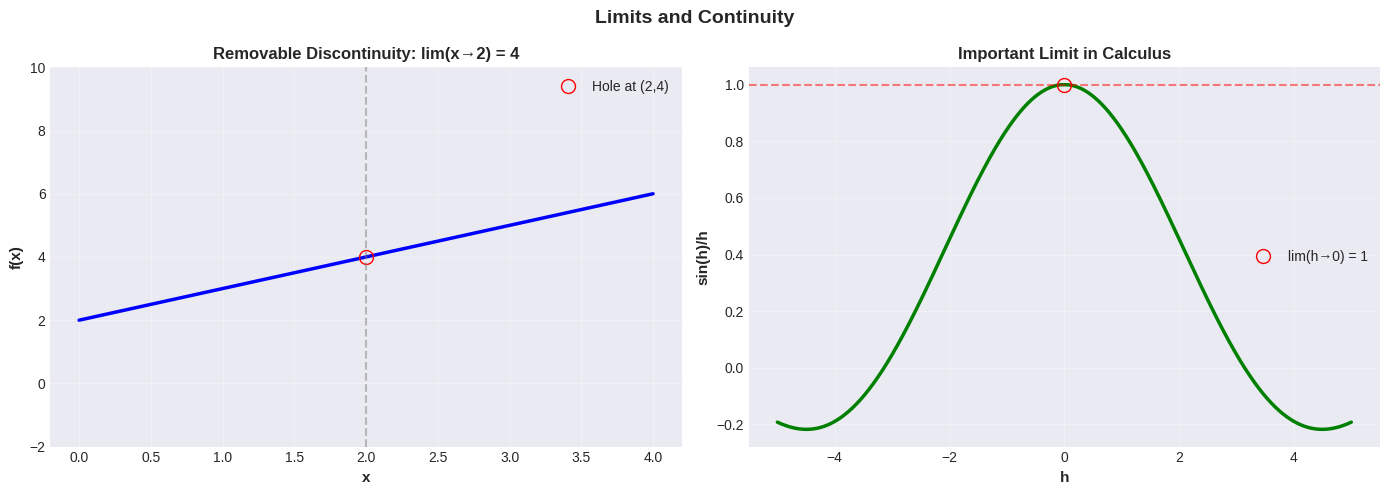

In [3]:
# Visualize limits
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Limits and Continuity', fontsize=14, fontweight='bold')

# Plot 1: Removable discontinuity
ax = axes[0]
x_vals = np.linspace(0, 4, 1000)
x_vals = x_vals[np.abs(x_vals - 2) > 0.05]
y_vals = (x_vals**2 - 4) / (x_vals - 2)

ax.plot(x_vals, y_vals, 'b-', linewidth=2.5)
ax.plot(2, 4, 'ro', markersize=10, fillstyle='none', linewidth=2, label='Hole at (2,4)')
ax.axvline(2, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('x', fontsize=11, fontweight='bold')
ax.set_ylabel('f(x)', fontsize=11, fontweight='bold')
ax.set_title('Removable Discontinuity: lim(x→2) = 4', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim(-2, 10)

# Plot 2: sin(h)/h
ax = axes[1]
h_vals = np.linspace(-5, 5, 1000)
h_vals = h_vals[np.abs(h_vals) > 0.05]
sinc_vals = np.sin(h_vals) / h_vals

ax.plot(h_vals, sinc_vals, 'g-', linewidth=2.5)
ax.plot(0, 1, 'ro', markersize=10, fillstyle='none', linewidth=2, label='lim(h→0) = 1')
ax.axhline(1, color='red', linestyle='--', alpha=0.5)
ax.set_xlabel('h', fontsize=11, fontweight='bold')
ax.set_ylabel('sin(h)/h', fontsize=11, fontweight='bold')
ax.set_title('Important Limit in Calculus', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. The Derivative: Definition and Intuition <a name="derivative-def"></a>

### Formal Definition

The **derivative** of $f(x)$ at point $a$ is:

$$f'(a) = \lim_{h \to 0} \frac{f(a+h) - f(a)}{h}$$

### Alternative Notations

- Lagrange: $f'(x)$
- Leibniz: $\frac{df}{dx}$
- Euler: $Df(x)$

### Three Interpretations

**1. Geometric**: Slope of tangent line to the curve at a point

**2. Physical**: Rate of change (velocity, acceleration, etc.)

**3. Analytical**: Sensitivity - how much output changes for small input change

### The Derivative as a Process

1. **Secant line** (average rate): $\Delta y / \Delta x = \frac{f(a+h) - f(a)}{h}$
2. **As $h \to 0$**: Secant becomes tangent
3. **In the limit**: We get instantaneous rate of change (derivative)

---

In [4]:
# Derivative from first principles
print("="*70)
print("THE DERIVATIVE: FROM FIRST PRINCIPLES")
print("="*70)

def f(x):
    return x**2

def deriv_approx(f, x_val, h):
    return (f(x_val + h) - f(x_val)) / h

x_val = 3.0
true_deriv = 2 * x_val  # f'(x) = 2x

print(f"\nFunction: f(x) = x²")
print(f"At x = {x_val}:")
print(f"True derivative f'({x_val}) = 2x = {true_deriv}")
print("\nh           | Approx f'(x) | Error")
print("-"*50)

h_values = [0.1, 0.01, 0.001, 0.0001, 1e-5]
for h in h_values:
    approx = deriv_approx(f, x_val, h)
    error = abs(approx - true_deriv)
    print(f"{h:11.0e} | {approx:12.8f} | {error:.2e}")

print("\nObservation: As h→0, approximation converges to true derivative!")

THE DERIVATIVE: FROM FIRST PRINCIPLES

Function: f(x) = x²
At x = 3.0:
True derivative f'(3.0) = 2x = 6.0

h           | Approx f'(x) | Error
--------------------------------------------------
      1e-01 |   6.10000000 | 1.00e-01
      1e-02 |   6.01000000 | 1.00e-02
      1e-03 |   6.00100000 | 1.00e-03
      1e-04 |   6.00010000 | 1.00e-04
      1e-05 |   6.00001000 | 1.00e-05

Observation: As h→0, approximation converges to true derivative!


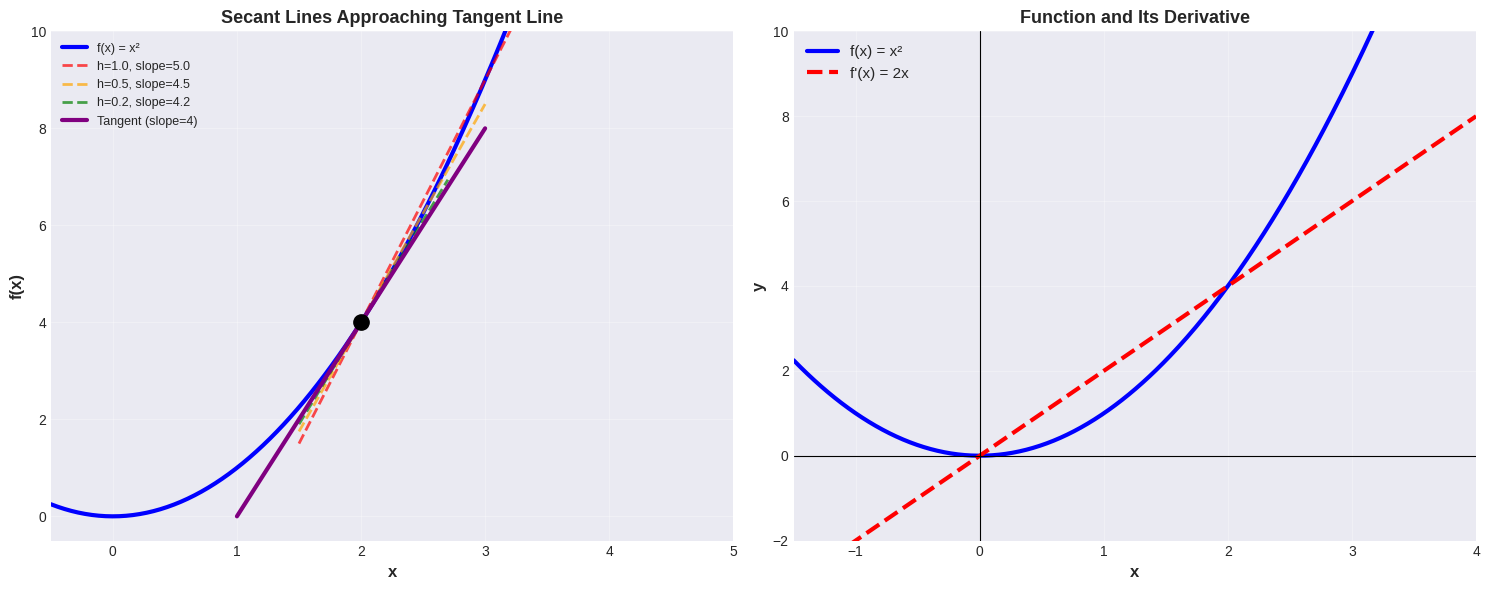

In [5]:
# Visualize secant to tangent
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left: Secants approaching tangent
ax = axes[0]
x_plot = np.linspace(-0.5, 5, 300)
y_plot = x_plot**2
ax.plot(x_plot, y_plot, 'b-', linewidth=3, label='f(x) = x²', zorder=2)

x0, y0 = 2, 4
ax.plot(x0, y0, 'ko', markersize=11, zorder=5)

# Display secant lines
h_vals_show = [1.0, 0.5, 0.2]
colors = ['red', 'orange', 'green']

for h, color in zip(h_vals_show, colors):
    x1 = x0 + h
    y1 = x1**2
    m = (y1 - y0) / h
    x_line = np.linspace(x0 - 0.5, x1 + 0.5, 100)
    y_line = y0 + m * (x_line - x0)
    ax.plot(x_line, y_line, color=color, linestyle='--', alpha=0.7, linewidth=2, label=f'h={h}, slope={m:.1f}')

# Tangent line
m_tangent = 2 * x0
x_tan = np.linspace(x0 - 1, x0 + 1, 100)
y_tan = y0 + m_tangent * (x_tan - x0)
ax.plot(x_tan, y_tan, 'purple', linewidth=3, label=f'Tangent (slope={m_tangent})', zorder=3)

ax.set_xlabel('x', fontsize=12, fontweight='bold')
ax.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax.set_title('Secant Lines Approaching Tangent Line', fontsize=13, fontweight='bold')
ax.legend(fontsize=9, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(-0.5, 5)
ax.set_ylim(-0.5, 10)

# Right: f(x) vs f'(x)
ax = axes[1]
x_plot2 = np.linspace(-1.5, 4, 400)
y_func = x_plot2**2
y_deriv = 2 * x_plot2

ax.plot(x_plot2, y_func, 'b-', linewidth=3, label='f(x) = x²', zorder=2)
ax.plot(x_plot2, y_deriv, 'r--', linewidth=3, label="f'(x) = 2x", zorder=2)
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)
ax.set_xlabel('x', fontsize=12, fontweight='bold')
ax.set_ylabel('y', fontsize=12, fontweight='bold')
ax.set_title('Function and Its Derivative', fontsize=13, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(-1.5, 4)
ax.set_ylim(-2, 10)

plt.tight_layout()
plt.show()

## 4. Basic Differentiation Rules <a name="basic-rules"></a>

### Essential Rules

**Constant Rule**: $\frac{d}{dx}c = 0$

**Power Rule**: $\frac{d}{dx}x^n = nx^{n-1}$

**Sum Rule**: $\frac{d}{dx}[f(x) + g(x)] = f'(x) + g'(x)$

**Constant Multiple**: $\frac{d}{dx}[cf(x)] = c \cdot f'(x)$

**Exponential**: $\frac{d}{dx}e^x = e^x$

**Logarithm**: $\frac{d}{dx}\ln(x) = \frac{1}{x}$

**Sine**: $\frac{d}{dx}\sin(x) = \cos(x)$

**Cosine**: $\frac{d}{dx}\cos(x) = -\sin(x)$

---

In [6]:
# Demonstrate basic rules
print("="*70)
print("BASIC DIFFERENTIATION RULES")
print("="*70)

x = sp.Symbol('x')

functions = [
    (x**5, "Power: x^5"),
    (x**(-2), "Negative power: x^(-2)"),
    (sp.sqrt(x), "Root: √x"),
    (sp.exp(x), "Exponential: e^x"),
    (sp.log(x), "Natural log: ln(x)"),
    (sp.sin(x), "Sine: sin(x)"),
    (sp.cos(x), "Cosine: cos(x)"),
    (3*x**4 - 2*x**3 + 5*x, "Polynomial: 3x^4 - 2x^3 + 5x"),
]

print("\n{'Function':<30} | {'Derivative':<35}")
print("-"*70)

for func, label in functions:
    deriv = sp.diff(func, x)
    print(f"{label:<30} | {str(deriv):<35}")

BASIC DIFFERENTIATION RULES

{'Function':<30} | {'Derivative':<35}
----------------------------------------------------------------------
Power: x^5                     | 5*x**4                             
Negative power: x^(-2)         | -2/x**3                            
Root: √x                       | 1/(2*sqrt(x))                      
Exponential: e^x               | exp(x)                             
Natural log: ln(x)             | 1/x                                
Sine: sin(x)                   | cos(x)                             
Cosine: cos(x)                 | -sin(x)                            
Polynomial: 3x^4 - 2x^3 + 5x   | 12*x**3 - 6*x**2 + 5               


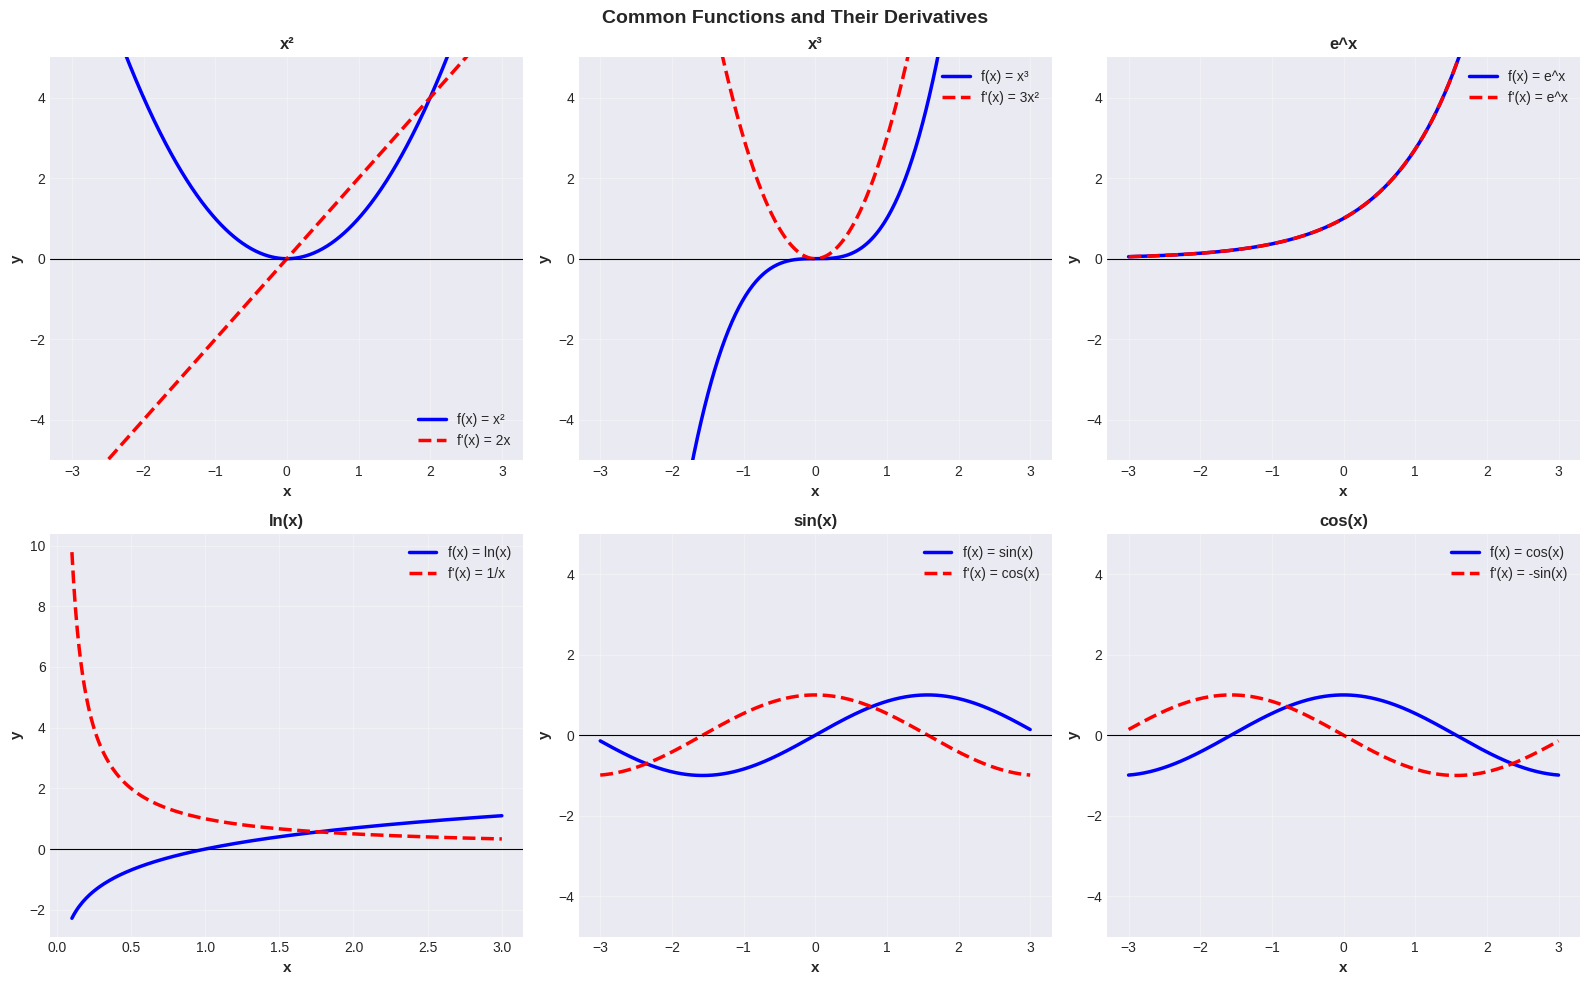

In [7]:
# Visualize common derivatives
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Common Functions and Their Derivatives', fontsize=14, fontweight='bold')
axes = axes.flatten()

x_vals = np.linspace(-3, 3, 500)

plots = [
    (x_vals**2, 2*x_vals, 'x²', '2x'),
    (x_vals**3, 3*x_vals**2, 'x³', '3x²'),
    (np.exp(x_vals), np.exp(x_vals), 'e^x', 'e^x'),
    (np.log(x_vals[x_vals > 0.1]), 1/x_vals[x_vals > 0.1], 'ln(x)', '1/x'),
    (np.sin(x_vals), np.cos(x_vals), 'sin(x)', 'cos(x)'),
    (np.cos(x_vals), -np.sin(x_vals), 'cos(x)', '-sin(x)'),
]

for idx, (f_vals, df_vals, f_label, df_label) in enumerate(plots):
    ax = axes[idx]
    
    if idx == 3:
        x_plot = x_vals[x_vals > 0.1]
    else:
        x_plot = x_vals
    
    ax.plot(x_plot, f_vals, 'b-', linewidth=2.5, label=f'f(x) = {f_label}')
    ax.plot(x_plot, df_vals, 'r--', linewidth=2.5, label=f"f'(x) = {df_label}")
    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_xlabel('x', fontsize=11, fontweight='bold')
    ax.set_ylabel('y', fontsize=11, fontweight='bold')
    ax.set_title(f'{f_label}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    
    if idx != 3:
        ax.set_ylim(-5, 5)

plt.tight_layout()
plt.show()

## 5. Chain Rule <a name="chain-rule"></a>

### The Most Important Rule

For composite functions $h(x) = f(g(x))$:

$$h'(x) = f'(g(x)) \cdot g'(x)$$

Or in Leibniz notation:
$$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$$

### Intuition

"Multiply the rates: rate $y$ changes with $u$ times rate $u$ changes with $x$"

### Examples

- $\sin(x^2)$: Derivative = $2x \cos(x^2)$
- $e^{3x}$: Derivative = $3e^{3x}$
- $(2x+1)^5$: Derivative = $10(2x+1)^4$

### Why It Matters

Most real-world functions are composite. The Chain Rule is fundamental to backpropagation in neural networks!

---

In [8]:
# Chain Rule examples
print("="*70)
print("CHAIN RULE: COMPOSITE FUNCTIONS")
print("="*70)

x = sp.Symbol('x')

examples = [
    (sp.sin(x**2), "sin(x²)", "sin(u) with u=x²"),
    (sp.exp(3*x), "e^(3x)", "e^u with u=3x"),
    ((2*x + 1)**5, "(2x+1)^5", "u^5 with u=2x+1"),
    (sp.ln(sp.sin(x)), "ln(sin(x))", "ln(u) with u=sin(x)"),
    (sp.exp(-x**2), "e^(-x²)", "e^u with u=-x²"),
]

for func, label, structure in examples:
    deriv = sp.diff(func, x)
    print(f"\n{label:<15} = {structure}")
    print(f"{'Derivative:':<15} {deriv}")
    print(f"{'Simplified:':<15} {sp.simplify(deriv)}")

CHAIN RULE: COMPOSITE FUNCTIONS

sin(x²)         = sin(u) with u=x²
Derivative:     2*x*cos(x**2)
Simplified:     2*x*cos(x**2)

e^(3x)          = e^u with u=3x
Derivative:     3*exp(3*x)
Simplified:     3*exp(3*x)

(2x+1)^5        = u^5 with u=2x+1
Derivative:     10*(2*x + 1)**4
Simplified:     10*(2*x + 1)**4

ln(sin(x))      = ln(u) with u=sin(x)
Derivative:     cos(x)/sin(x)
Simplified:     1/tan(x)

e^(-x²)         = e^u with u=-x²
Derivative:     -2*x*exp(-x**2)
Simplified:     -2*x*exp(-x**2)


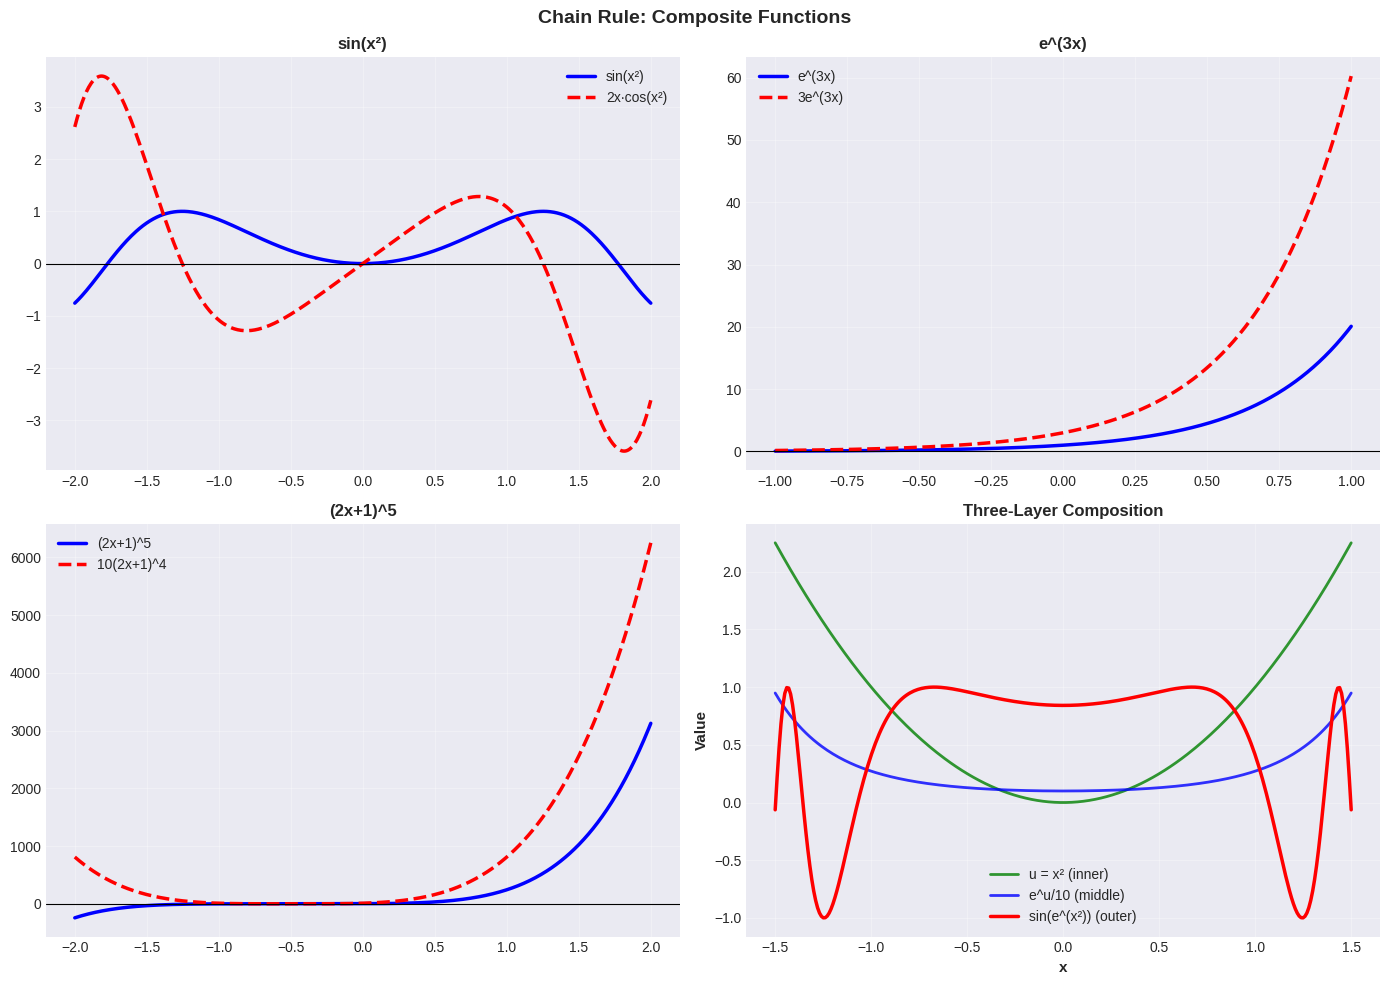

In [9]:
# Visualize Chain Rule
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Chain Rule: Composite Functions', fontsize=14, fontweight='bold')

x_vals = np.linspace(-2, 2, 500)

# sin(x²)
ax = axes[0, 0]
y1 = np.sin(x_vals**2)
dy1 = 2*x_vals*np.cos(x_vals**2)
ax.plot(x_vals, y1, 'b-', linewidth=2.5, label='sin(x²)')
ax.plot(x_vals, dy1, 'r--', linewidth=2.5, label="2x·cos(x²)")
ax.axhline(0, color='black', linewidth=0.8)
ax.set_title('sin(x²)', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# e^(3x)
ax = axes[0, 1]
x_vals2 = np.linspace(-1, 1, 500)
y2 = np.exp(3*x_vals2)
dy2 = 3*np.exp(3*x_vals2)
ax.plot(x_vals2, y2, 'b-', linewidth=2.5, label='e^(3x)')
ax.plot(x_vals2, dy2, 'r--', linewidth=2.5, label="3e^(3x)")
ax.axhline(0, color='black', linewidth=0.8)
ax.set_title('e^(3x)', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# (2x+1)^5
ax = axes[1, 0]
y3 = (2*x_vals + 1)**5
dy3 = 10*(2*x_vals + 1)**4
ax.plot(x_vals, y3, 'b-', linewidth=2.5, label='(2x+1)^5')
ax.plot(x_vals, dy3, 'r--', linewidth=2.5, label="10(2x+1)^4")
ax.axhline(0, color='black', linewidth=0.8)
ax.set_title('(2x+1)^5', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Composition layers
ax = axes[1, 1]
x_comp = np.linspace(-1.5, 1.5, 300)
u = x_comp**2
v = np.exp(u)
w = np.sin(v)

ax.plot(x_comp, u, 'g-', linewidth=2, alpha=0.8, label='u = x² (inner)', zorder=2)
ax.plot(x_comp, v/10, 'b-', linewidth=2, alpha=0.8, label='e^u/10 (middle)', zorder=2)
ax.plot(x_comp, w, 'r-', linewidth=2.5, label='sin(e^(x²)) (outer)', zorder=3)
ax.set_xlabel('x', fontsize=11, fontweight='bold')
ax.set_ylabel('Value', fontsize=11, fontweight='bold')
ax.set_title('Three-Layer Composition', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Product and Quotient Rules <a name="product-quotient"></a>

### Product Rule

For $h(x) = f(x) \cdot g(x)$:

$$h'(x) = f'(x)g(x) + f(x)g'(x)$$

**Mnemonic**: "Left-d-right plus right-d-left"

### Quotient Rule

For $h(x) = \frac{f(x)}{g(x)}$:

$$h'(x) = \frac{f'(x)g(x) - f(x)g'(x)}{[g(x)]^2}$$

**Mnemonic**: "Low d-high minus high d-low, over low squared"

### Examples

**Product**: $(x^2 \sin x)' = 2x \sin x + x^2 \cos x$

**Quotient**: $\left(\frac{\sin x}{x}\right)' = \frac{x \cos x - \sin x}{x^2}$

---

In [10]:
# Product and Quotient Rules
print("="*70)
print("PRODUCT AND QUOTIENT RULES")
print("="*70)

x = sp.Symbol('x')

# Product Rule examples
print("\nPRODUCT RULE: (f·g)' = f'·g + f·g'")
print("-"*70)

products = [
    (x**2 * sp.sin(x), "x² · sin(x)"),
    (sp.exp(x) * sp.cos(x), "e^x · cos(x)"),
    ((x**2 + 1) * (x**3 - 2*x), "(x²+1)(x³-2x)"),
]

for func, label in products:
    deriv = sp.diff(func, x)
    simplified = sp.simplify(deriv)
    print(f"\n{label}")
    print(f"  Derivative: {deriv}")
    print(f"  Simplified: {simplified}")

# Quotient Rule examples
print("\n\nQUOTIENT RULE: (f/g)' = (f'·g - f·g') / g²")
print("-"*70)

quotients = [
    (sp.sin(x) / x, "sin(x)/x"),
    ((x**2 + 1) / (x - 1), "(x²+1)/(x-1)"),
    (sp.exp(x) / (x**2 + 1), "e^x/(x²+1)"),
]

for func, label in quotients:
    deriv = sp.diff(func, x)
    simplified = sp.simplify(deriv)
    print(f"\n{label}")
    print(f"  Derivative: {deriv}")
    print(f"  Simplified: {simplified}")

PRODUCT AND QUOTIENT RULES

PRODUCT RULE: (f·g)' = f'·g + f·g'
----------------------------------------------------------------------

x² · sin(x)
  Derivative: x**2*cos(x) + 2*x*sin(x)
  Simplified: x*(x*cos(x) + 2*sin(x))

e^x · cos(x)
  Derivative: -exp(x)*sin(x) + exp(x)*cos(x)
  Simplified: sqrt(2)*exp(x)*cos(x + pi/4)

(x²+1)(x³-2x)
  Derivative: 2*x*(x**3 - 2*x) + (x**2 + 1)*(3*x**2 - 2)
  Simplified: 5*x**4 - 3*x**2 - 2


QUOTIENT RULE: (f/g)' = (f'·g - f·g') / g²
----------------------------------------------------------------------

sin(x)/x
  Derivative: cos(x)/x - sin(x)/x**2
  Simplified: (x*cos(x) - sin(x))/x**2

(x²+1)/(x-1)
  Derivative: 2*x/(x - 1) - (x**2 + 1)/(x - 1)**2
  Simplified: (-x**2 + 2*x*(x - 1) - 1)/(x - 1)**2

e^x/(x²+1)
  Derivative: -2*x*exp(x)/(x**2 + 1)**2 + exp(x)/(x**2 + 1)
  Simplified: (x**2 - 2*x + 1)*exp(x)/(x**2 + 1)**2


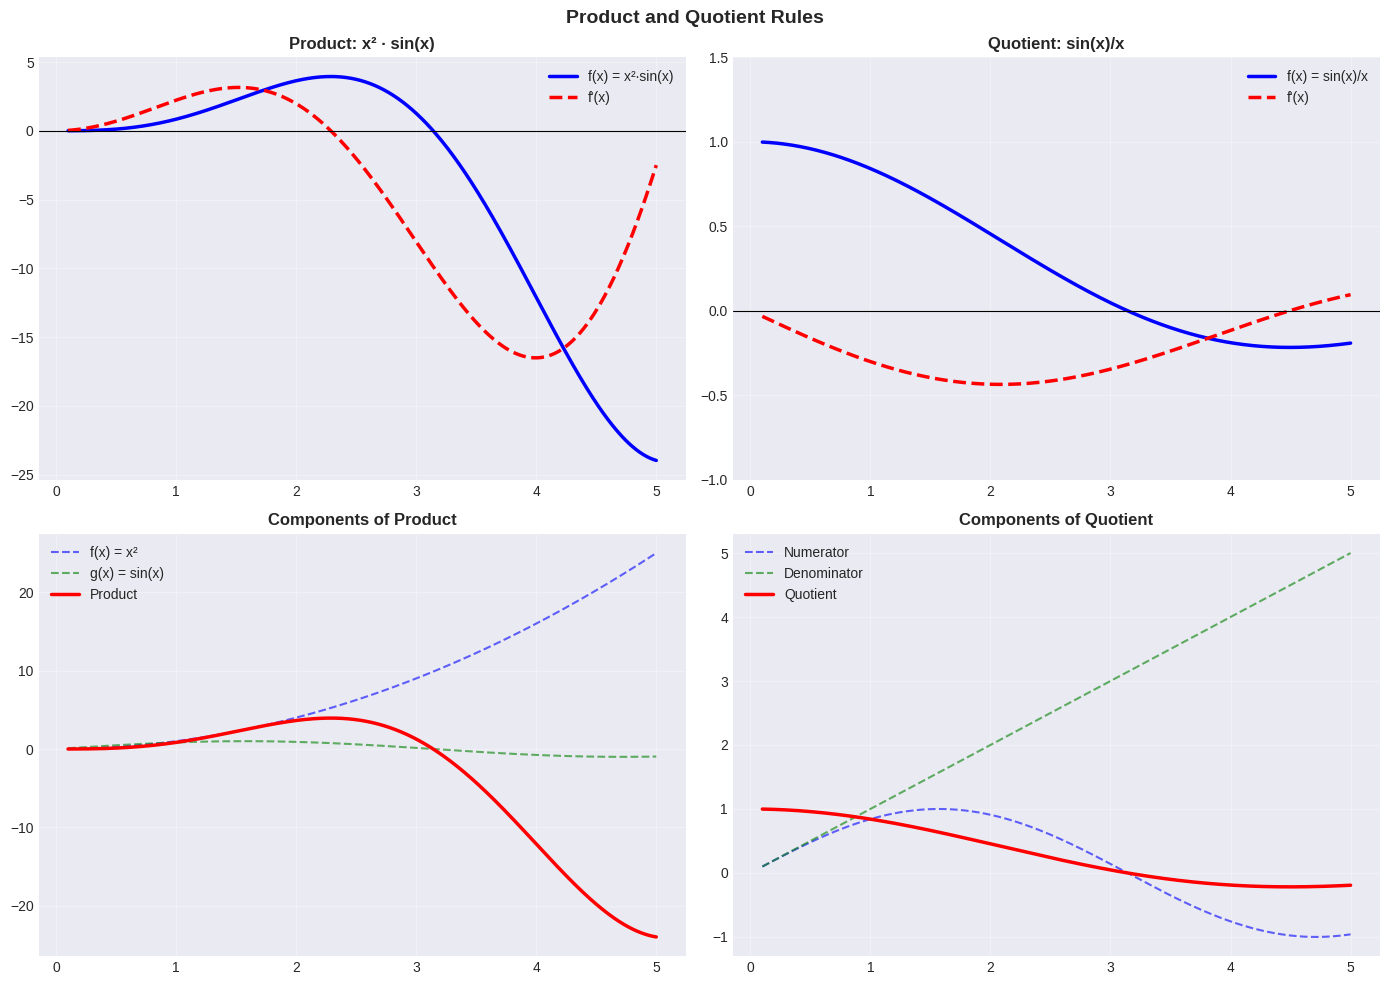

In [11]:
# Visualize Product and Quotient Rules
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Product and Quotient Rules', fontsize=14, fontweight='bold')

x_vals = np.linspace(0.1, 5, 500)

# Product: x² · sin(x)
ax = axes[0, 0]
y_prod = x_vals**2 * np.sin(x_vals)
dy_prod = 2*x_vals*np.sin(x_vals) + x_vals**2*np.cos(x_vals)
ax.plot(x_vals, y_prod, 'b-', linewidth=2.5, label='f(x) = x²·sin(x)')
ax.plot(x_vals, dy_prod, 'r--', linewidth=2.5, label="f'(x)")
ax.axhline(0, color='black', linewidth=0.8)
ax.set_title('Product: x² · sin(x)', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Quotient: sin(x)/x
ax = axes[0, 1]
y_quot = np.sin(x_vals) / x_vals
dy_quot = (x_vals*np.cos(x_vals) - np.sin(x_vals)) / x_vals**2
ax.plot(x_vals, y_quot, 'b-', linewidth=2.5, label='f(x) = sin(x)/x')
ax.plot(x_vals, dy_quot, 'r--', linewidth=2.5, label="f'(x)")
ax.axhline(0, color='black', linewidth=0.8)
ax.set_title('Quotient: sin(x)/x', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_ylim(-1, 1.5)

# Components of product
ax = axes[1, 0]
f_comp = x_vals**2
g_comp = np.sin(x_vals)
ax.plot(x_vals, f_comp, 'b--', linewidth=1.5, alpha=0.6, label='f(x) = x²')
ax.plot(x_vals, g_comp, 'g--', linewidth=1.5, alpha=0.6, label='g(x) = sin(x)')
ax.plot(x_vals, f_comp * g_comp, 'r-', linewidth=2.5, label='Product')
ax.set_title('Components of Product', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Components of quotient
ax = axes[1, 1]
f_quot = np.sin(x_vals)
g_quot = x_vals
ax.plot(x_vals, f_quot, 'b--', linewidth=1.5, alpha=0.6, label='Numerator')
ax.plot(x_vals, g_quot, 'g--', linewidth=1.5, alpha=0.6, label='Denominator')
ax.plot(x_vals, f_quot/g_quot, 'r-', linewidth=2.5, label='Quotient')
ax.set_title('Components of Quotient', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Higher-Order Derivatives <a name="higher-order"></a>

### Second Derivative

The **second derivative** is the derivative of the derivative:

$$f''(x) = \frac{d}{dx}\left(\frac{df}{dx}\right) = \frac{d^2f}{dx^2}$$

### Interpretations

- **Physically**: Acceleration (rate of change of velocity)
- **Geometrically**: Concavity (how the curve bends)

### Concavity Test

- If $f''(x) > 0$: Curve is **concave up** (smiling)
- If $f''(x) < 0$: Curve is **concave down** (frowning)
- If $f''(x) = 0$: Possible **inflection point**

### Example

For $f(x) = x^3 - 3x$:
- $f'(x) = 3x^2 - 3$
- $f''(x) = 6x$

---

## 8. Partial Derivatives <a name="partial"></a>

### Functions of Multiple Variables

For $f(x, y)$, we compute derivatives with respect to each variable:

$$\frac{\partial f}{\partial x} = \lim_{h \to 0} \frac{f(x+h, y) - f(x,y)}{h}$$

**Key idea**: Keep other variables constant

### Example

For $f(x, y) = x^2 y + xy^2$:
- $\frac{\partial f}{\partial x} = 2xy + y^2$
- $\frac{\partial f}{\partial y} = x^2 + 2xy$

---

## 9. Optimization and Applications <a name="optimization"></a>

### Finding Extrema

To find maximum or minimum of $f(x)$:

1. **Find critical points**: Solve $f'(x) = 0$
2. **Use second derivative test**: 
   - $f''(x) > 0$ → Local minimum
   - $f''(x) < 0$ → Local maximum
   - $f''(x) = 0$ → Test further

### Real-World Applications

- **Cost minimization**: Find optimal production level
- **Profit maximization**: Find best pricing strategy
- **Machine learning**: Gradient descent optimization
- **Engineering**: Stress minimization in structures

---

In [12]:
# Optimization example
print("="*70)
print("OPTIMIZATION: FINDING EXTREMA")
print("="*70)

x = sp.Symbol('x')

# Example: f(x) = x³ - 3x² - 9x + 5
f = x**3 - 3*x**2 - 9*x + 5

print("\nFunction: f(x) = x³ - 3x² - 9x + 5")
print("\nStep 1: Find f'(x)")
f_prime = sp.diff(f, x)
print(f"f'(x) = {f_prime}")

print("\nStep 2: Solve f'(x) = 0")
critical_points = sp.solve(f_prime, x)
print(f"Critical points: {critical_points}")

print("\nStep 3: Find f''(x)")
f_double_prime = sp.diff(f_prime, x)
print(f"f''(x) = {f_double_prime}")

print("\nStep 4: Test critical points")
for cp in critical_points:
    second_deriv_val = f_double_prime.subs(x, cp)
    f_val = f.subs(x, cp)
    
    if second_deriv_val > 0:
        extremum_type = "LOCAL MINIMUM"
    elif second_deriv_val < 0:
        extremum_type = "LOCAL MAXIMUM"
    else:
        extremum_type = "INFLECTION POINT"
    
    print(f"\n  x = {cp}:")
    print(f"    f(x) = {f_val}")
    print(f"    f''(x) = {second_deriv_val}")
    print(f"    Type: {extremum_type}")

OPTIMIZATION: FINDING EXTREMA

Function: f(x) = x³ - 3x² - 9x + 5

Step 1: Find f'(x)
f'(x) = 3*x**2 - 6*x - 9

Step 2: Solve f'(x) = 0
Critical points: [-1, 3]

Step 3: Find f''(x)
f''(x) = 6*x - 6

Step 4: Test critical points

  x = -1:
    f(x) = 10
    f''(x) = -12
    Type: LOCAL MAXIMUM

  x = 3:
    f(x) = -22
    f''(x) = 12
    Type: LOCAL MINIMUM


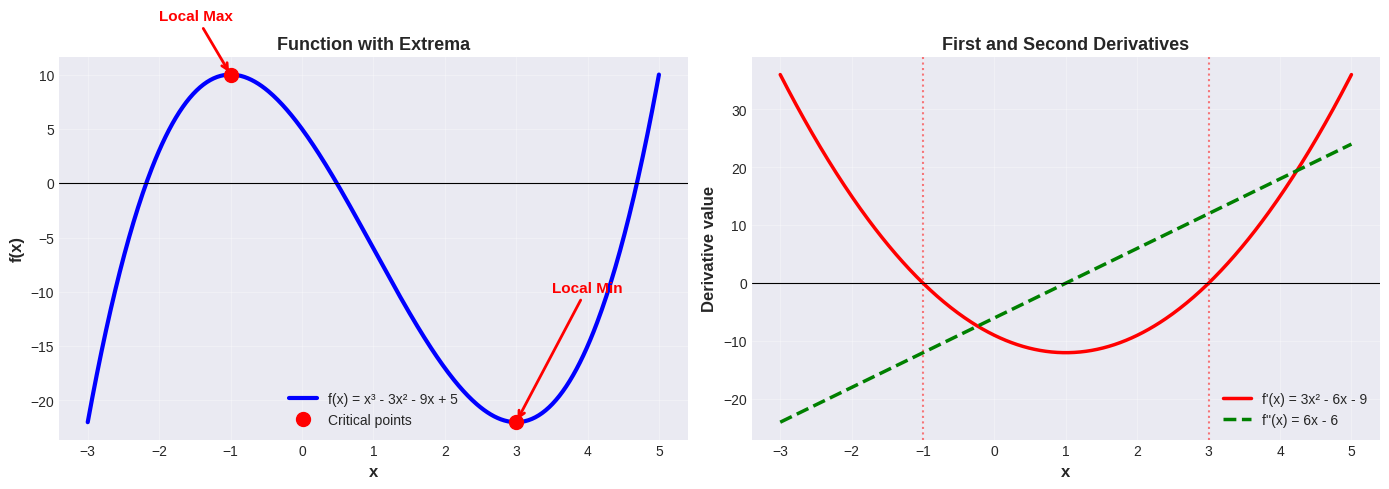

In [13]:
# Visualize optimization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x_vals = np.linspace(-3, 5, 500)
f_vals = x_vals**3 - 3*x_vals**2 - 9*x_vals + 5
f_prime_vals = 3*x_vals**2 - 6*x_vals - 9
f_double_prime_vals = 6*x_vals - 6

# Function with critical points and extrema
ax = axes[0]
ax.plot(x_vals, f_vals, 'b-', linewidth=3, label='f(x) = x³ - 3x² - 9x + 5')

# Critical points
critical_pts = [-1.0, 3.0]
critical_vals = [f for f in [(-1)**3 - 3*(-1)**2 - 9*(-1) + 5, 3**3 - 3*3**2 - 9*3 + 5]]
ax.plot(critical_pts, critical_vals, 'ro', markersize=10, label='Critical points')

# Annotations
ax.annotate('Local Max', xy=(-1, 10), xytext=(-2, 15),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, fontweight='bold', color='red')
ax.annotate('Local Min', xy=(3, -22), xytext=(3.5, -10),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, fontweight='bold', color='red')

ax.axhline(0, color='black', linewidth=0.8)
ax.set_xlabel('x', fontsize=12, fontweight='bold')
ax.set_ylabel('f(x)', fontsize=12, fontweight='bold')
ax.set_title('Function with Extrema', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Derivatives
ax = axes[1]
ax.plot(x_vals, f_prime_vals, 'r-', linewidth=2.5, label="f'(x) = 3x² - 6x - 9")
ax.plot(x_vals, f_double_prime_vals, 'g--', linewidth=2.5, label="f''(x) = 6x - 6")
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(-1, color='red', linestyle=':', alpha=0.5)
ax.axvline(3, color='red', linestyle=':', alpha=0.5)
ax.set_xlabel('x', fontsize=12, fontweight='bold')
ax.set_ylabel('Derivative value', fontsize=12, fontweight='bold')
ax.set_title('First and Second Derivatives', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Summary and Resources <a name="summary"></a>

### Key Concepts Covered

1. **Limits**: Foundation of calculus
2. **Derivatives**: Instantaneous rate of change
3. **Differentiation Rules**: Power, chain, product, quotient
4. **Applications**: Optimization and analysis

### Most Important Rules

- **Power Rule**: $\frac{d}{dx}x^n = nx^{n-1}$
- **Chain Rule**: $h'(x) = f'(g(x)) \cdot g'(x)$
- **Product Rule**: $(fg)' = f'g + fg'$
- **Quotient Rule**: $(f/g)' = \frac{f'g - fg'}{g^2}$

### For Further Learning

- **Integration**: Reverse of differentiation
- **Multivariable calculus**: Functions of multiple variables
- **Differential equations**: Equations involving derivatives
- **Numerical methods**: Computational calculus
- **Applications**: Deep learning, physics, economics

---